# LABS-6: Design Project

In this notebook you will run and edit the code to perform some exploratory data analytics (EDA) and to develop and answer a question using data.

**Data**\
This dataset comes from IMDB and can be accessed on [Kaggle](https://www.kaggle.com/datasets/ashpalsingh1525/imdb-movies-dataset).

## Set up environment

In [4]:
## import packages

import pandas as pd #data manipulation & analysis
import numpy as np #arrays & math
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #statistical visualization
from scipy.stats import gaussian_kde #scientific computing

In [5]:
# Readb in datab
data = pd.read_csv("imdb_movies.csv")

In [7]:
data.head()

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US


In [6]:
import os
print(os.getcwd())
print(os.listdir())

/workspaces/DS1001-LABS-Projects
['.git', 'LABS-06_Design-2.ipynb', 'requirements.txt', '.gitignore', '.vscode', 'LABS-03_Systems.ipynb', 'SofiaSlade_env', 'imdb_movies.csv', 'README.md', 'LICENSE']


## Understand your data

First we want to understand what the data looks like and how much of it there is. \
To do that, we can start by looking at: 
- the shape of the data
- viewing a portion of the data
- checking the data types for each column
- looking at the summary stats of our numeric columns

The data is stored in a [pandas dataframe](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html). This is a tabular data structure that can store different types of data like numbers and text. Dataframes are an object in python, and therfore have attributes and methods that we can use to help us understand the data. You will learn several of these below.

### Shape

The [shape](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shape.html#pandas.DataFrame.shape) attribute tells us the shape of the data, or how many rows and columns are in our dataset. 

Since this is an attribute, we call it using this format: `df.shape` where `df` is the name of your dataframe.

This attribute returns the shape in this format: (# rows, # columns)

Run the cell below to get the shape of the dataframe and answer **question 1**.


In [9]:
data.shape

(10178, 12)

### View a portion of the Data

It is useful to be able to see what our data actually looks like - but we usually only need to see a few rows to understand what it looks like. Dataframes have a method called [`.head()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.head.html#pandas.DataFrame.head) that displays the first *n* rows of the dataframe. 

Since this is a method, we call it using this format: `df.head()` where `df` is the name of your dataframe.

You can specify how many rows you want to see by specifying the *n* parameter inside the parenthesis. Let's look at the first 10 rows of our dataframe. Run the cell below to see data.

In [10]:
data.head(n=10)

,names,date_x,score,genre,overview,crew,orig_title,status,orig_lang,budget_x,revenue,country
0,Creed III,03/02/2023,73.0,"Drama, Action","After dominating the boxing world, Adonis Cree...","Michael B. Jordan, Adonis Creed, Tessa Thompso...",Creed III,Released,English,75000000.0,2.716167e+08,AU
1,Avatar: The Way of Water,12/15/2022,78.0,"Science Fiction, Adventure, Action",Set more than a decade after the events of the...,"Sam Worthington, Jake Sully, Zoe Saldaña, Neyt...",Avatar: The Way of Water,Released,English,460000000.0,2.316795e+09,AU
2,The Super Mario Bros. Movie,04/05/2023,76.0,"Animation, Adventure, Family, Fantasy, Comedy","While working underground to fix a water main,...","Chris Pratt, Mario (voice), Anya Taylor-Joy, P...",The Super Mario Bros. Movie,Released,English,100000000.0,7.244590e+08,AU
3,Mummies,01/05/2023,70.0,"Animation, Comedy, Family, Adventure, Fantasy","Through a series of unfortunate events, three ...","Óscar Barberán, Thut (voice), Ana Esther Albor...",Momias,Released,"Spanish, Castilian",12300000.0,3.420000e+07,AU
4,Supercell,03/17/2023,61.0,Action,Good-hearted teenager William always lived in ...,"Skeet Ulrich, Roy Cameron, Anne Heche, Dr Quin...",Supercell,Released,English,77000000.0,3.409420e+08,US
5,Cocaine Bear,02/23/2023,66.0,"Thriller, Comedy, Crime","Inspired by a true story, an oddball group of ...","Keri Russell, Sari, Alden Ehrenreich, Eddie, O...",Cocaine Bear,Released,English,35000000.0,8.000000e+07,AU
6,John Wick: Chapter 4,03/23/2023,80.0,"Action, Thriller, Crime","With the price on his head ever increasing, Jo...","Keanu Reeves, John Wick, Donnie Yen, Caine, Bi...",John Wick: Chapter 4,Released,English,100000000.0,3.513494e+08,AU
7,Puss in Boots: The Last Wish,12/26/2022,83.0,"Animation, Family, Fantasy, Adventure, Comedy",Puss in Boots discovers that his passion for a...,"Antonio Banderas, Puss in Boots (voice), Salma...",Puss in Boots: The Last Wish,Released,English,90000000.0,4.834806e+08,AU
8,Attack on Titan,09/30/2022,59.0,"Action, Science Fiction","As viable water is depleted on Earth, a missio...","Paul Bianchi, Computer (voice), Erin Coker, Al...",Attack on Titan,Released,English,71000000.0,2.549465e+08,US
9,The Park,03/02/2023,58.0,"Action, Drama, Horror, Science Fiction, Thriller",A dystopian coming-of-age movie focused on thr...,"Chloe Guidry, Ines, Nhedrick Jabier, Bui, Carm...",The Park,Released,English,119200000.0,4.889625e+08,US


### Check data types for each column

Now we will check the data types so we know how to handle each column during cleaning and analysis. The [`.info()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.info.html#pandas.DataFrame.info) method gives us a quick summary of the dataset. It tells us how many entries (rows) there are, the names of the columns, the data type stored in each column, and how many values are missing.

Since this is a method, we call it like a function using this format: `df.info()` where `df` is the name of your DataFrame.

This method prints the details directly to the workspace.


**In the cell below, write the code to call the .info() method on `data`. Use the previous examples and documentation linked above to help you.**

In [11]:
# ENTER YOUR CODE TO RUN .info() HERE
data.info()


<class 'pandas.DataFrame'>
RangeIndex: 10178 entries, 0 to 10177
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   names       10178 non-null  str    
 1   date_x      10178 non-null  str    
 2   score       10178 non-null  float64
 3   genre       10093 non-null  str    
 4   overview    10178 non-null  str    
 5   crew        10122 non-null  str    
 6   orig_title  10178 non-null  str    
 7   status      10178 non-null  str    
 8   orig_lang   10178 non-null  str    
 9   budget_x    10178 non-null  float64
 10  revenue     10178 non-null  float64
 11  country     10178 non-null  str    
dtypes: float64(3), str(9)
memory usage: 954.3 KB


Here are a few helpful tips to help you answer **question 5**:
- Python stores numbers either as integers (int) or floating point decimals (float). Python stores other data types (like strings and lists) as objects.
- "non-null" means rows without missing values.

### Look at summary stats for numeric columns

Now we will summarize our columns to spot patterns and outliers during cleaning and analysis. The [`.describe()`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.describe.html#pandas.DataFrame.describe) method gives us a quick set of summary statistics. By default, it reports the following values for numeric columns: 
- count
- mean
- standard deviation
- minimum
- quartiles (25%, 50%, 75%)
- maximum

Since this is a method, we call it using this format: `df.describe()` where `df` is the name of your DataFrame.

This method returns a new DataFrame of summary statistics.

**In the cell below, write the code to call the .describe() method on `data`. Use the previous examples and documentation linked above to help you.**

In [12]:
# ENTER YOUR CODE TO RUN .describe() HERE

data.describe()

,score,budget_x,revenue
count,10178.000000,1.017800e+04,1.017800e+04
mean,63.497052,6.488238e+07,2.531401e+08
std,13.537012,5.707565e+07,2.777880e+08
min,0.000000,1.000000e+00,0.000000e+00
25%,59.000000,1.500000e+07,2.858898e+07
50%,65.000000,5.000000e+07,1.529349e+08
75%,71.000000,1.050000e+08,4.178021e+08
max,100.000000,4.600000e+08,2.923706e+09


## Visualize the Data

Now we want to visualize the data to see if we can pull out any initial trends off the bat. These will inform the questions we ask and our modeling process later on. We will use 3 common graphs to look at some baseline relationships and distributions of our data:
- Scatterplot
- Bar chart
- Density plot

It is important to remember that the point of this process it to understand trends and distributions of your data. There are many other plots data scientists use to do this - these are just a few basic ones.

To visualize the data we will use 2 packages: [`MatPlotLib`](https://matplotlib.org/) and [`Seaborn`](https://seaborn.pydata.org/). These were imported at the beginning of the notebook with aliases - short hand that we can use to reference the package in our code. The alias for `MatPlotLib` is `plt` and `Seaborn` is `sns`. These are the standard aliases used for these packages. 

### Scatterplot

[Scatterplots](https://matplotlib.org/stable/gallery/shapes_and_collections/scatter.html) show the relationship between 2 or more variables. You can add other features, like point shape and color, to your graph to see relationships of additional variables.

Run the cell below to create a scatterplot of the relationship between movie budget and revenue.

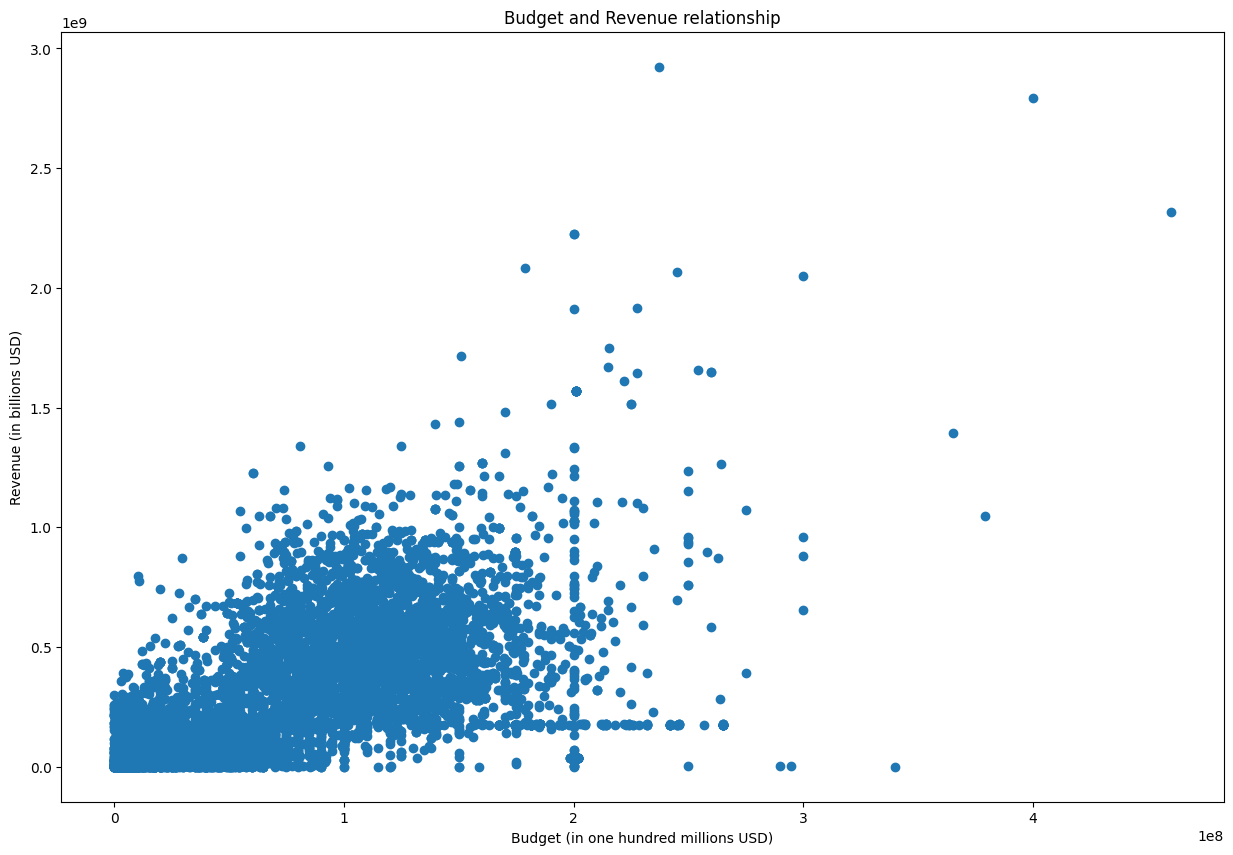

In [13]:
fig, ax = plt.subplots(figsize=(15, 10))
ax.scatter(data['budget_x'], data['revenue'])

plt.ylabel("Revenue (in billions USD)")
plt.xlabel("Budget (in one hundred millions USD)")
plt.title("Budget and Revenue relationship")
plt.show()

### Bar Chart

A [Bar Chart](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.bar.html#matplotlib.pyplot.bar) shows comparisons between categories by using rectangular bars. The height of each bar represents the value or frequency of that category. You can customize bar color, orientation, and grouping to highlight patterns or differences across multiple variables.

The cell below has the code to produce a bar chart using the default color settings. **Use the documentation linked above to change the color of the bars.**

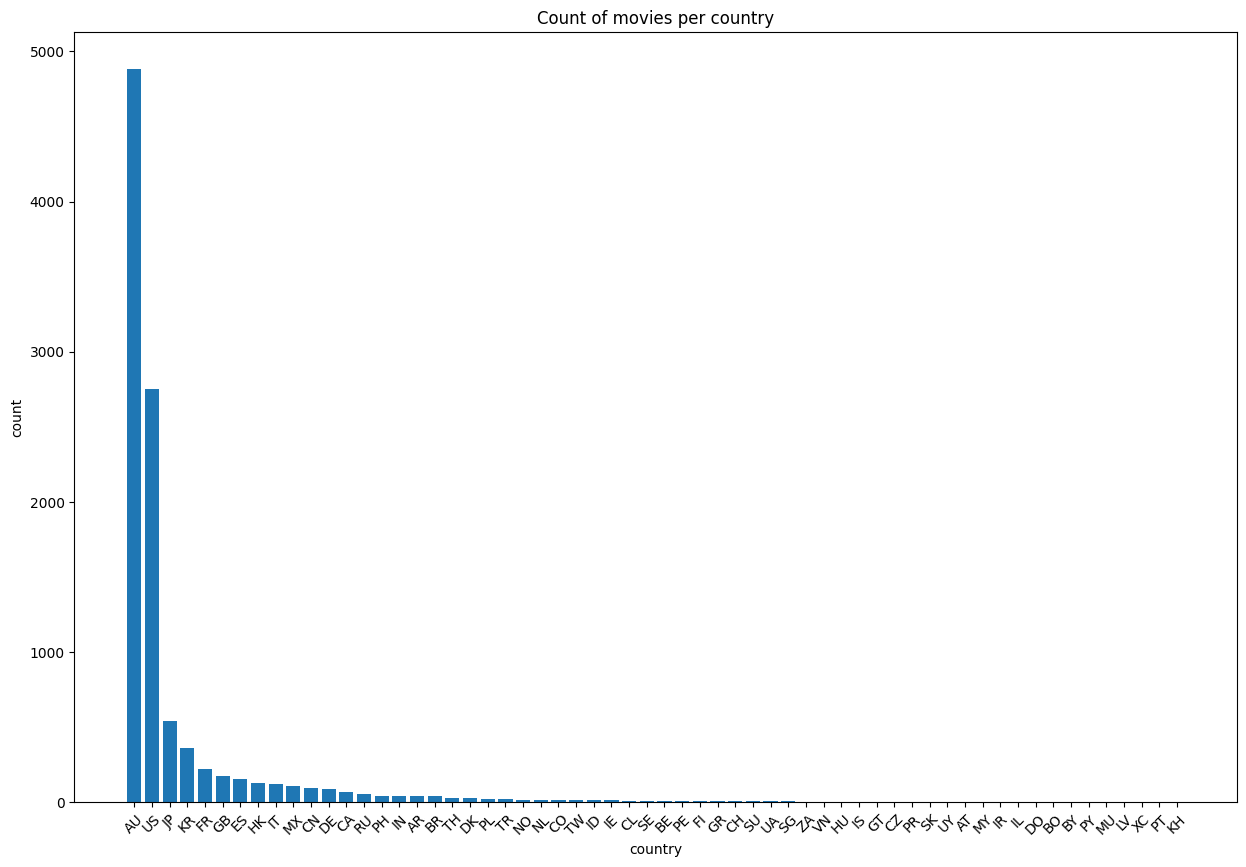

In [14]:
country_counts = data['country'].value_counts()

fig, ax = plt.subplots(figsize=(15, 10))
ax.bar(country_counts.index, country_counts.values) 
ax.tick_params("x", rotation=45)

plt.ylabel("count")
plt.xlabel("country")
plt.title("Count of movies per country")
plt.show()

### Density plot

A [Density Plot](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) shows the distribution of a continuous variable by estimating its probability density function. This is similar to histograms, but density plots use smooth curves to represent data, making it easier to compare distributions and spot patterns. You can adjust the smoothness and overlay multiple curves to explore differences across groups.

The cell below has the code to produce a Density plot, but is missing a title. **Add the code to produce a title before running the cell.**

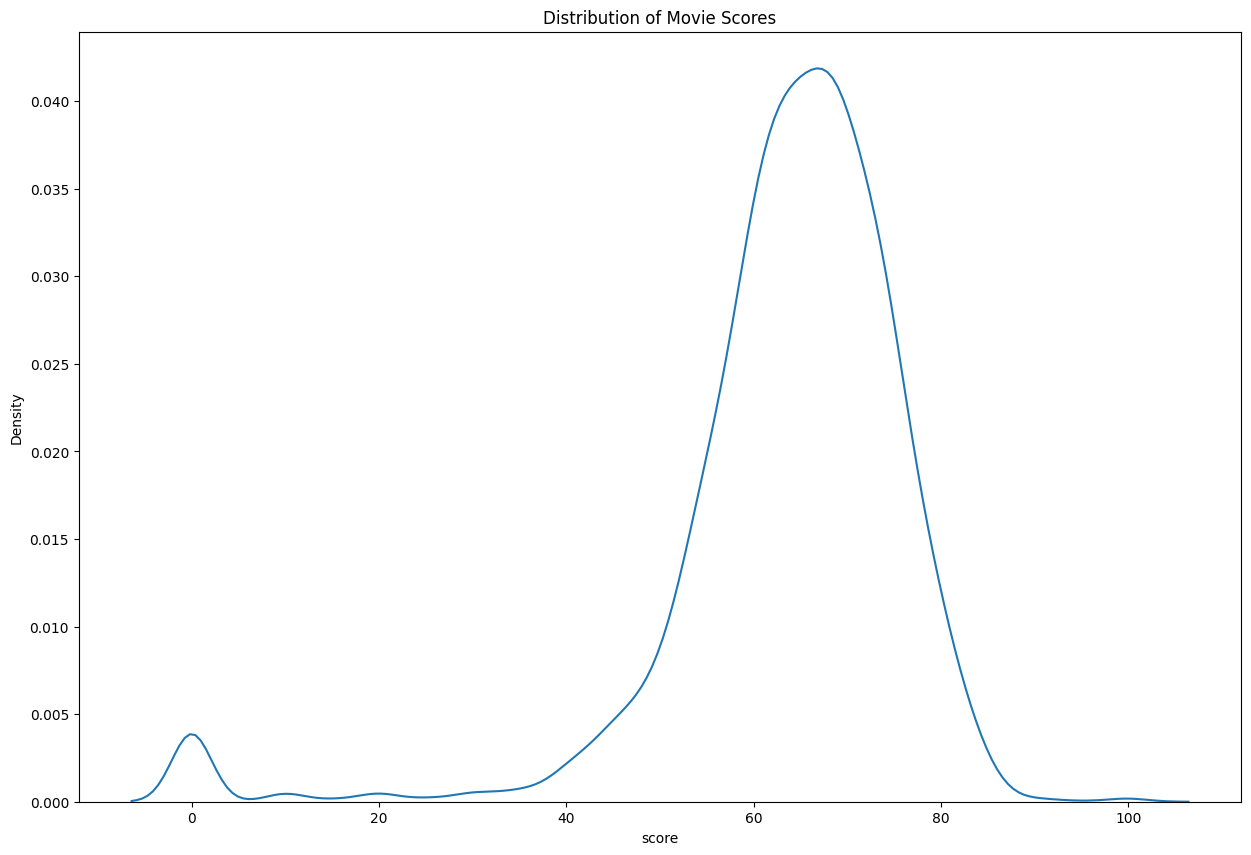

In [15]:
x = data['score']
plt.figure(figsize=(15, 10))
sns.kdeplot(data=data, x="score")

## ADD CODE TO PRODUCE TITLE HERE
plt.title("Distribution of Movie Scores")
plt.show()

## Develop and Answer a Question

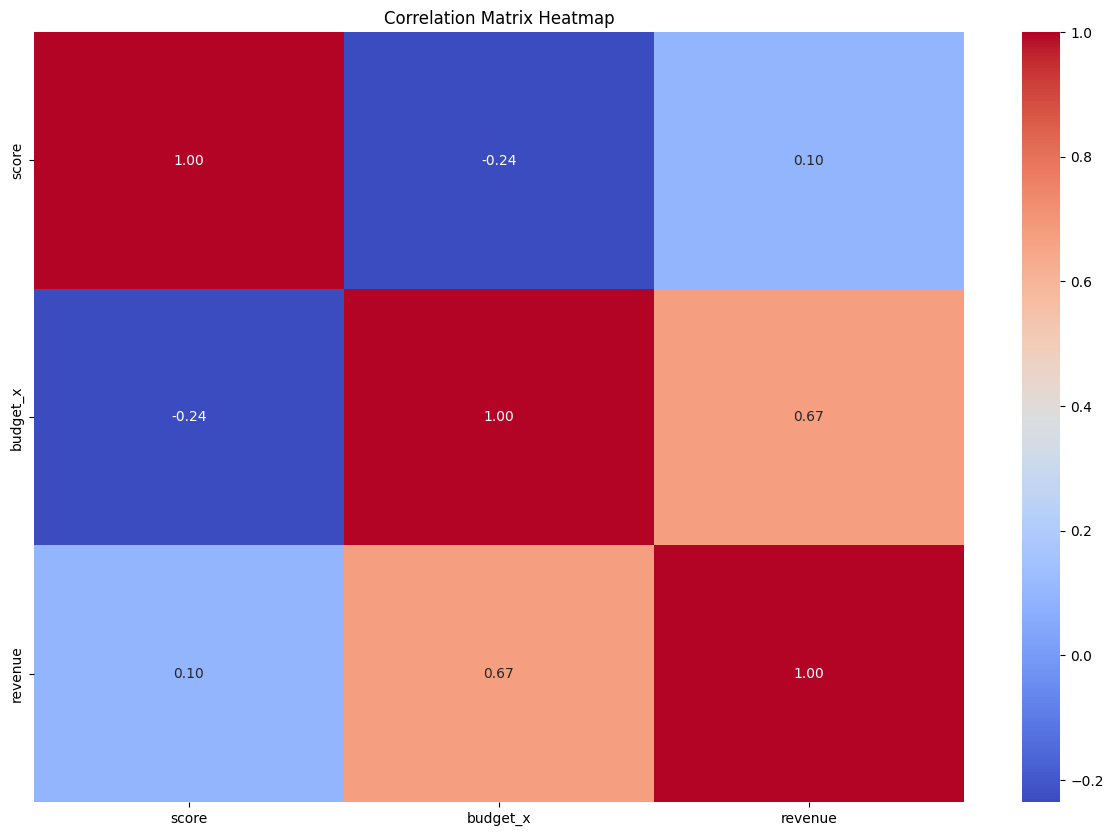

In [16]:
correlation_matrix = data[['score', 'budget_x', 'revenue']].corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Heatmap')
plt.show()